In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.2f}'.format

pd.set_option('display.max_columns', 9999)

In [2]:
df = pd.read_excel('online_retail_II.xlsx', sheet_name= 0)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [5]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [7]:
df[df['Quantity'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [8]:
df["Invoice"] = df["Invoice"].astype(str)
df[df["Invoice"].str.match("^\\d{6}$") == False] 
""" not getting six digit invoices """

' not getting six digit invoices '

In [9]:
df['Invoice'].str.replace("[0-9]", "", regex= True).unique()

array(['', 'C', 'A'], dtype=object)

In [10]:
df[df["Invoice"].str.startswith("A")] 
""" remove this kind of records """

' remove this kind of records '

In [11]:
df['StockCode'] =  df['StockCode'].astype(str)
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [12]:
""" keep pads along with standard 5 digits stock along with 5 digits with letters following """
df[df['StockCode'].str.contains('^PADS')] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


In [13]:
clean_df = df.copy()

In [14]:
clean_df["Invoice"] = clean_df["Invoice"].astype("str")

mask = (
    clean_df['Invoice'].str.match('^\\d{6}$') == True
)

clean_df = clean_df[mask]
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [15]:
clean_df["StockCode"] = clean_df["StockCode"].astype("str")

mask = (
    (clean_df["StockCode"].str.match("^\\d{5}$") == True)
    | (clean_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (clean_df["StockCode"].str.match("^PADS$") == True)
)

clean_df = clean_df[mask]
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [16]:
len(clean_df[clean_df['Customer ID'].isna()]["Customer ID"])

106459

In [17]:
clean_df.dropna(subset=["Customer ID"], inplace= True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28396\3633423759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.dropna(subset=["Customer ID"], inplace= True)


In [18]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [19]:
len(clean_df[clean_df["Price"] == 0])

28

In [20]:
clean_df = clean_df[clean_df["Price"] > 0.00]

In [21]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [22]:
str(round((len(clean_df) / len(df)) * 100, 2)) + " %"

'77.32 %'

Dropped about 22.68% of the records during cleaning 

In [23]:
#adding sales column
clean_df["SalesTotal"] = clean_df["Quantity"] * clean_df["Price"]
clean_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28396\777411304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["SalesTotal"] = clean_df["Quantity"] * clean_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


<h3>EDA</h3>

In [24]:
countries_sales = clean_df.groupby(by="Country", as_index=False) \
    .agg(
        {"SalesTotal": "mean"}
    )
top_ten_countries_avg_sales = countries_sales.sort_values("SalesTotal", ascending=False).head(10)

since the dataset is from online retail based on Uk,
Make assumption that currency is £ 

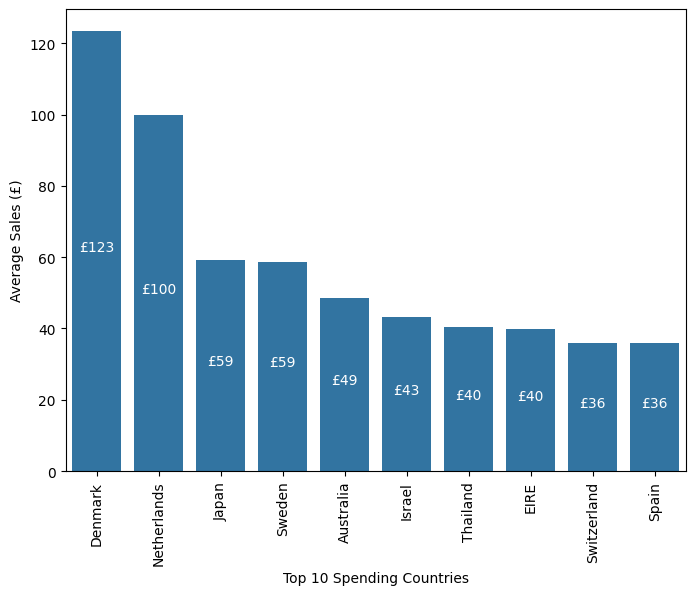

In [25]:
plt.figure(figsize=(8,6))

ax = sns.barplot(data=top_ten_countries_avg_sales, x="Country", y="SalesTotal")

for container in ax.containers:
    ax.bar_label(container, fmt="£%0.f", label_type="center", padding=3, color="white")

plt.ylabel("Average Sales (£)")
plt.xlabel("Top 10 Spending Countries")
plt.xticks(rotation = 90)
plt.show()

In [26]:
#average sales per invoice & country
avg_sales_per_invoice_country = clean_df.groupby(["Invoice", "Country"], as_index=False)["SalesTotal"].sum()
avg_sales_per_invoice_country
summary_avg_sales_per_invoice_country = avg_sales_per_invoice_country.groupby(by="Country", as_index=False).agg(
    NumInvoices=("Invoice", "nunique"),
    AvgInvoiceSales=("SalesTotal", "mean")
)
summary_avg_sales_per_invoice_country = summary_avg_sales_per_invoice_country.sort_values(["NumInvoices","AvgInvoiceSales"], ascending=False).head(3)
summary_avg_sales_per_invoice_country

,Country,NumInvoices,AvgInvoiceSales
34,United Kingdom,17497,420.43
12,Germany,325,563.88
9,EIRE,281,1189.47


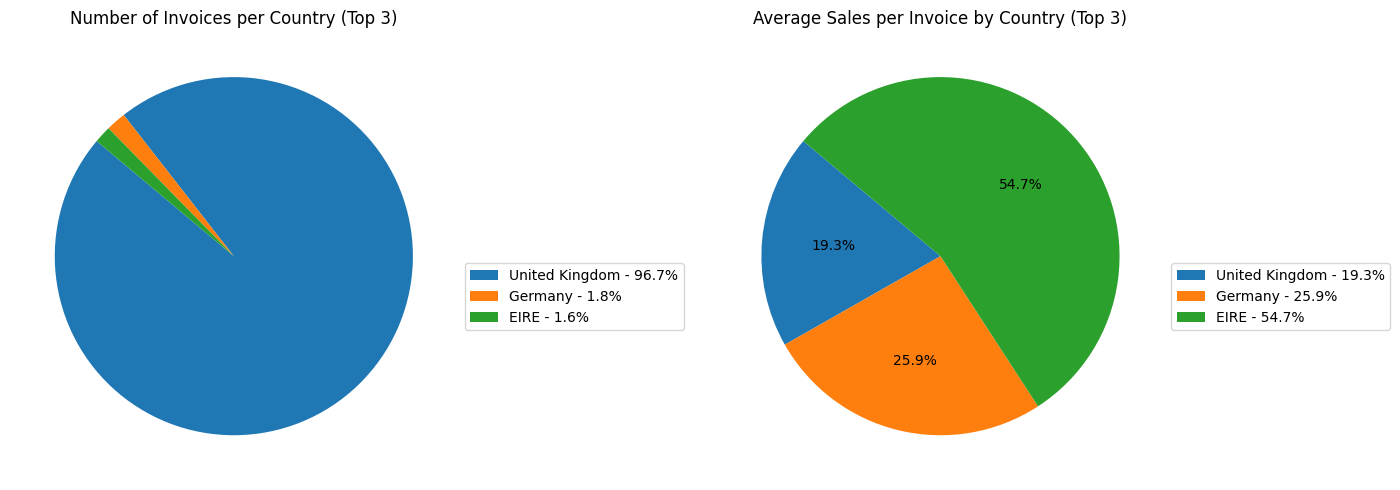

In [27]:
plt.figure(figsize=(15, 5))

# Subplot 1: Number of Invoices per Country
plt.subplot(1, 2, 1)
sizes1 = summary_avg_sales_per_invoice_country["NumInvoices"]
labels1 = summary_avg_sales_per_invoice_country["Country"]
patches1, texts1, autotexts1 = plt.pie(sizes1, autopct="", startangle=140)
plt.title("Number of Invoices per Country (Top 3)")
# Hide labels from pie and use legend instead
for text in texts1:
    text.set_visible(False)
plt.legend(patches1, [f"{l} - {s:.1f}%" for l, s in zip(labels1, 100 * sizes1 / sizes1.sum())],
           loc="best", bbox_to_anchor=(1, 0.5))

# Subplot 2: Average Sales per Invoice by Country
plt.subplot(1, 2, 2)
sizes2 = summary_avg_sales_per_invoice_country["AvgInvoiceSales"]
labels2 = summary_avg_sales_per_invoice_country["Country"]
patches2, texts2, autotexts2 = plt.pie(sizes2, autopct="%1.1f%%", startangle=140)
plt.title("Average Sales per Invoice by Country (Top 3)")
# Hide labels from pie and use legend instead
for text in texts2:
    text.set_visible(False)
plt.legend(patches2, [f"{l} - {s:.1f}%" for l, s in zip(labels2, 100 * sizes2 / sizes2.sum())],
           loc="best", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [28]:
#average quantity by country
quantity = clean_df.groupby(by="Country", as_index=False) \
    .agg(
        {"Quantity": "mean"}
    )
top_ten_countries_avg_quantity = quantity.sort_values("Quantity", ascending=False).head(10)
top_ten_countries_avg_quantity

,Country,Quantity
8,Denmark,562.89
21,Netherlands,68.95
29,Sweden,62.28
17,Japan,44.58
31,Thailand,33.58
0,Australia,32.29
11,France,30.58
23,Norway,21.72
9,EIRE,21.62
30,Switzerland,19.38


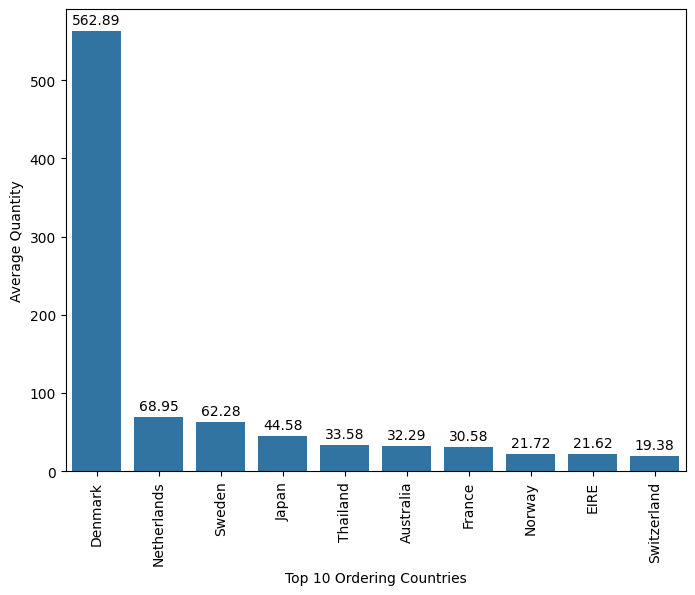

In [29]:
plt.figure(figsize=(8,6))

ax = sns.barplot(data=top_ten_countries_avg_quantity, x="Country", y="Quantity")

for container in ax.containers:
    ax.bar_label(container, fmt="%0.2f", label_type="edge", padding=3)

plt.ylabel("Average Quantity")
plt.xlabel("Top 10 Ordering Countries")
plt.xticks(rotation = 90)
plt.show()

In [30]:
#Most Sell Product
description = clean_df.groupby(by="Description", as_index=False).agg(
    {"SalesTotal": "mean"}
)

top_ten_selling_products = description.sort_values("SalesTotal", ascending=False).head(10)
top_ten_selling_products

,Description,SalesTotal
2373,"MIRROR, ARCHED GEORGIAN",3884.00
1337,ENGLISH ROSE EDWARDIAN PARASOL,1515.00
3816,SMALL FAIRY CAKE FRIDGE MAGNETS,1375.00
2131,LARGE HANGING GLASS+ZINC LANTERN,896.00
573,BLUE PAINTED KASHMIRI TABLE,495.00
2016,IVORY WALL CLOCK,459.00
3233,RED WALL CLOCK,459.00
1861,HALL CABINET WITH 3 DRAWERS,434.85
2211,LITTLE FLOWER SHOPPER BAG,424.00
317,BAG FOR CHILDREN VINTAGE PINK,408.00


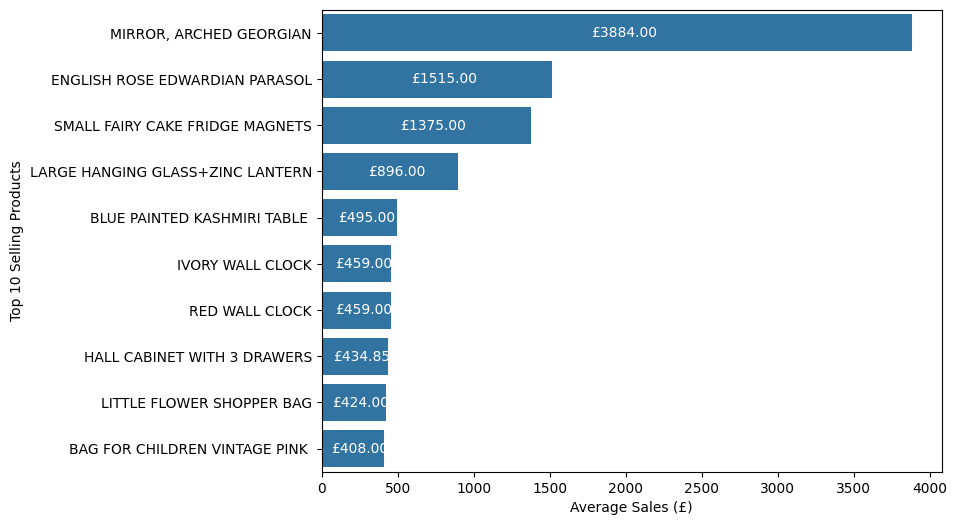

In [31]:
plt.figure(figsize=(8,6))

ax = sns.barplot(data=top_ten_selling_products, x="SalesTotal", y="Description")

for container in ax.containers:
    ax.bar_label(container, fmt="£%0.2f", label_type="center", padding=5, color="white")

plt.xlabel("Average Sales (£)")
plt.ylabel("Top 10 Selling Products")
""" plt.xticks(rotation = 90) """
plt.show()

<h3>Feature Engineering</h3>

In [32]:
new_df = clean_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("SalesTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )
new_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00
...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00
4281,18284.00,411.68,1,2010-10-04 11:33:00
4282,18285.00,377.00,1,2010-02-17 10:24:00
4283,18286.00,1246.43,2,2010-08-20 11:57:00


In [33]:
max_invoice = new_df["LastInvoiceDate"].max()

new_df["Recency"] = (max_invoice - new_df["LastInvoiceDate"]).dt.days

new_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17
4281,18284.00,411.68,1,2010-10-04 11:33:00,66
4282,18285.00,377.00,1,2010-02-17 10:24:00,295
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111


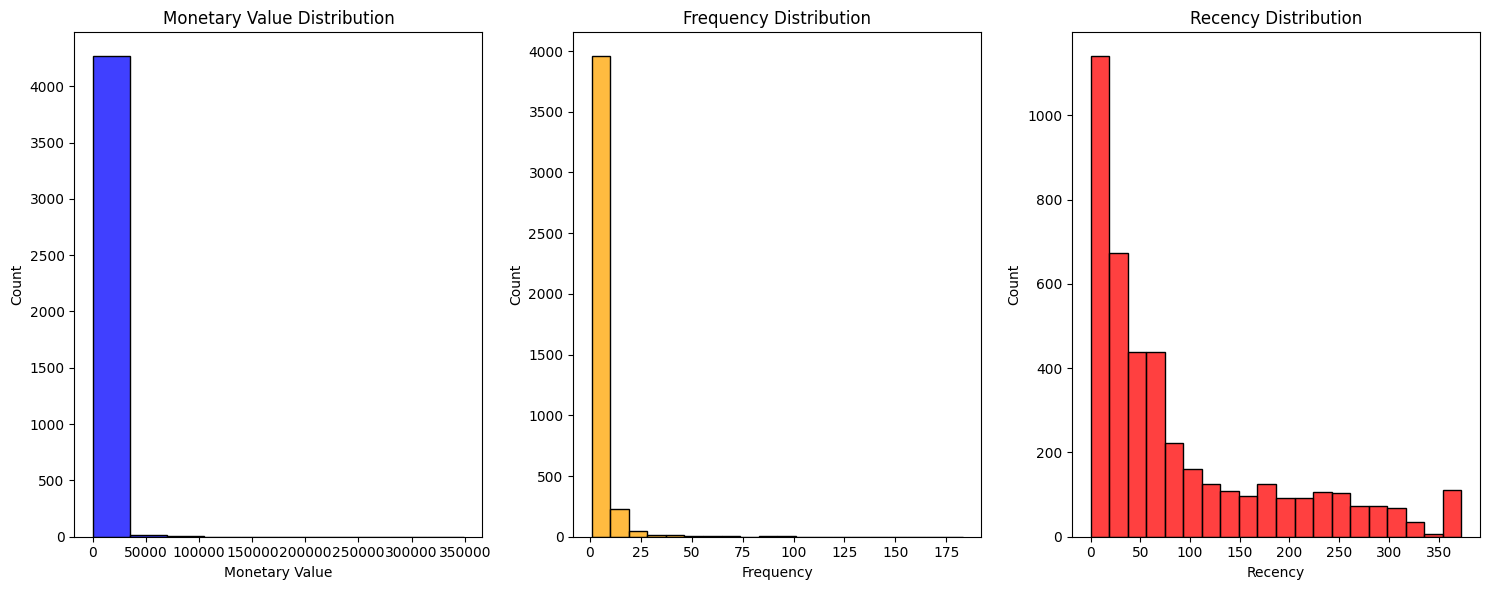

In [34]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.histplot(new_df["MonetaryValue"], bins=10, color="blue")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.histplot(new_df["Frequency"], bins=20, color="orange")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.histplot(new_df["Recency"], bins=20, color="red")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

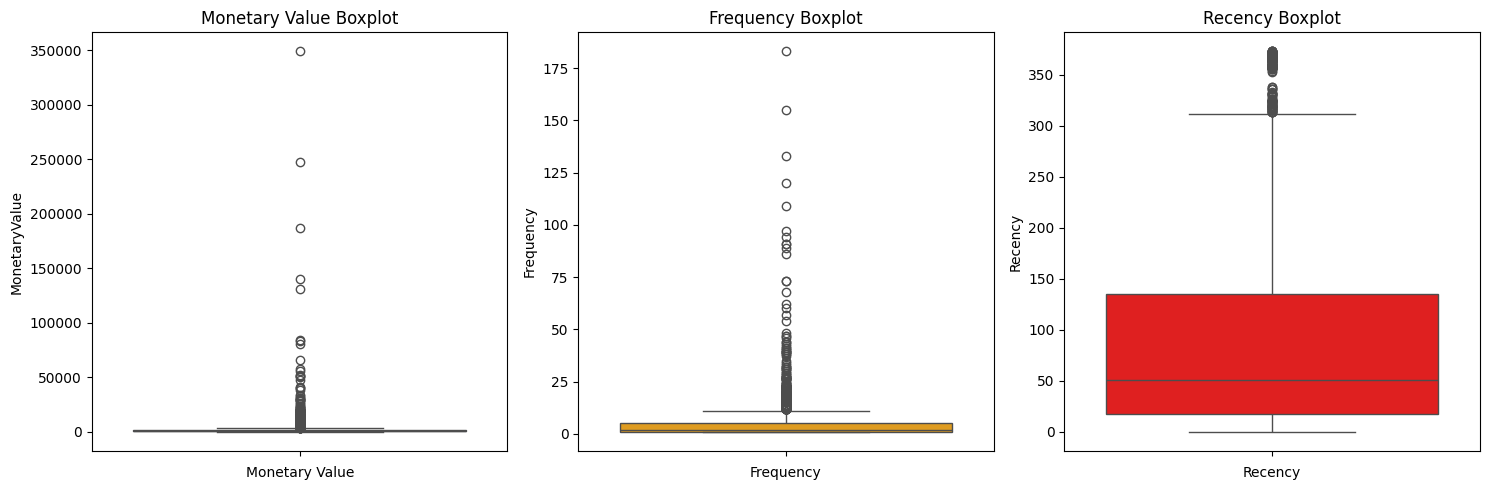

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(new_df["MonetaryValue"], color="blue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")

plt.subplot(1,3,2)
sns.boxplot(new_df["Frequency"], color="orange")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(new_df["Recency"], color="red")
plt.title("Recency Boxplot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

In [36]:
Monetary_Q1 = new_df["MonetaryValue"].quantile(0.25)
Monetary_Q3 = new_df["MonetaryValue"].quantile(0.75)
Monetary_IQR = Monetary_Q3 - Monetary_Q1

monetary_outliers_df = new_df[(new_df["MonetaryValue"] > (Monetary_Q3 + 1.5 * Monetary_IQR)) | (new_df["MonetaryValue"] < (Monetary_Q1 - 1.5 * Monetary_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [37]:
Frequency_Q1 = new_df["Frequency"].quantile(0.25)
Frequency_Q3 = new_df["Frequency"].quantile(0.75)
Frequency_IQR = Frequency_Q3 - Frequency_Q1

frequency_outliers_df = new_df[(new_df["Frequency"] > (Frequency_Q3 + 1.5 * Frequency_IQR)) | (new_df["Frequency"] < (Frequency_Q1 - 1.5 * Frequency_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [38]:
non_outliers_df = new_df[(~new_df.index.isin(monetary_outliers_df.index)) & (~new_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


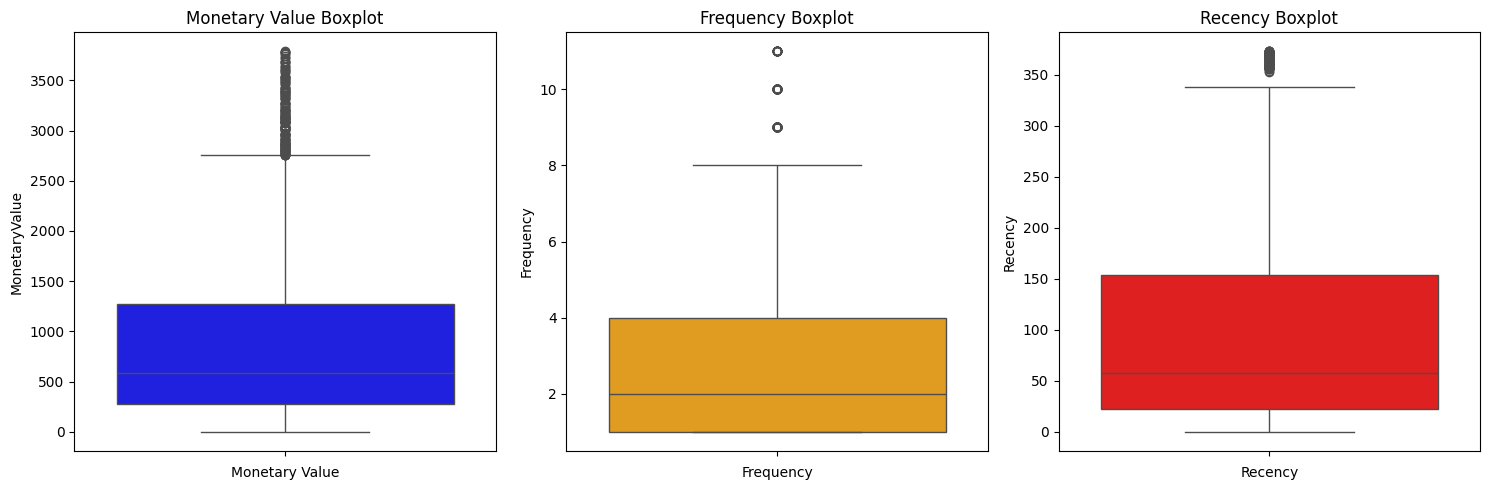

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outliers_df["MonetaryValue"], color="blue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")

plt.subplot(1,3,2)
sns.boxplot(non_outliers_df["Frequency"], color="orange")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(non_outliers_df["Recency"], color="red")
plt.title("Recency Boxplot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

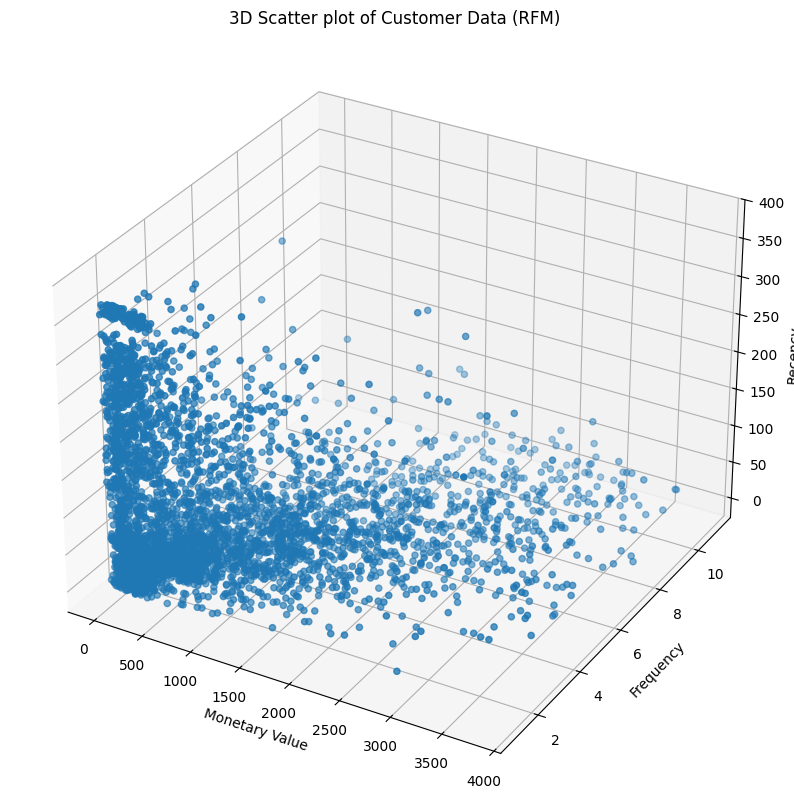

In [40]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection= "3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter plot of Customer Data (RFM)")

plt.show()

In [41]:
# make the data standard using standard scale transformation so that each feature contributes equally to clustering

scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue","Frequency","Recency"]])
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]], shape=(3809, 3))

In [42]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue","Frequency","Recency"))
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


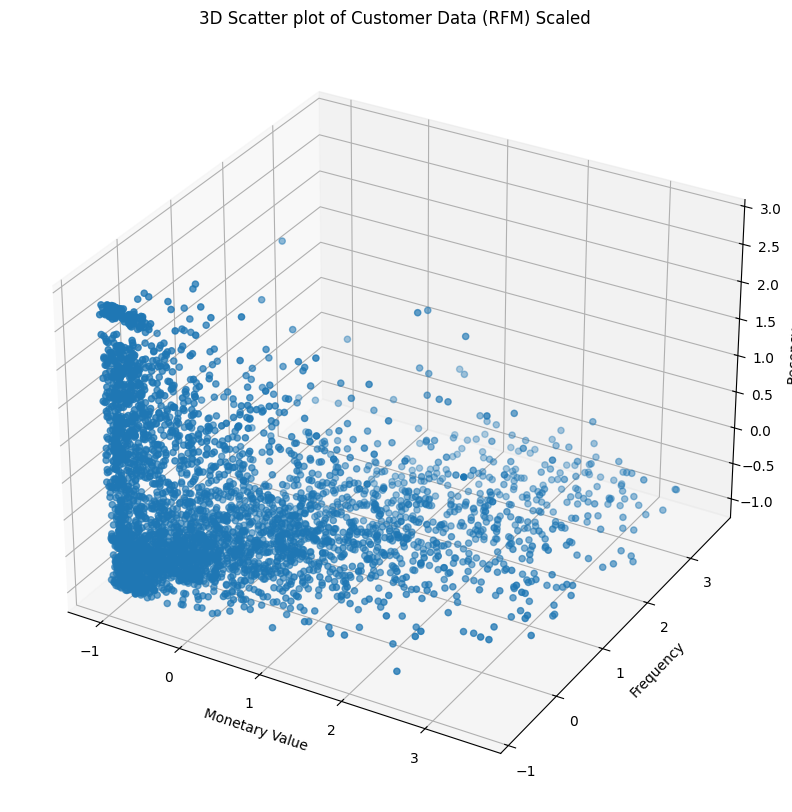

In [43]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection= "3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter plot of Customer Data (RFM) Scaled")

plt.show()

<h3>KMeans Clustering</h3>

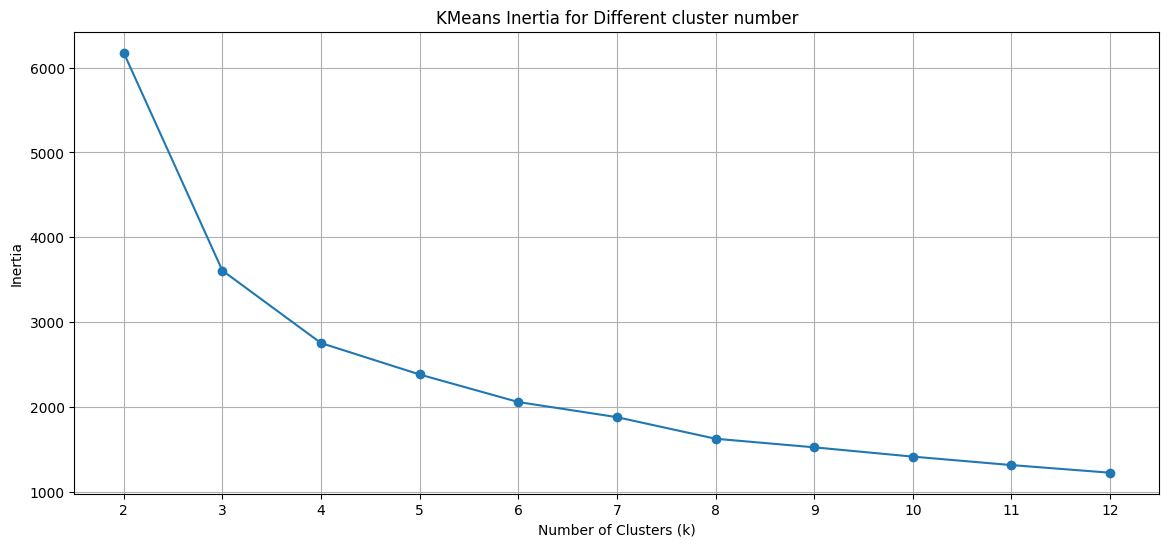

In [44]:
max_k = 12

inertia = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1000, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))
plt.plot(k_values, inertia, marker='o')
plt.title("KMeans Inertia for Different cluster number")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.show()



looks like k=4 forms the elbow so picking 4 as number of clusters

In [45]:
kmeans = KMeans(n_clusters=4, random_state=1000, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([2, 0, 3, ..., 2, 0, 0], shape=(3809,), dtype=int32)

In [46]:
non_outliers_df["Cluster"] = cluster_labels
non_outliers_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28396\1071184375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,2
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,3
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,3
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,3
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,2
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


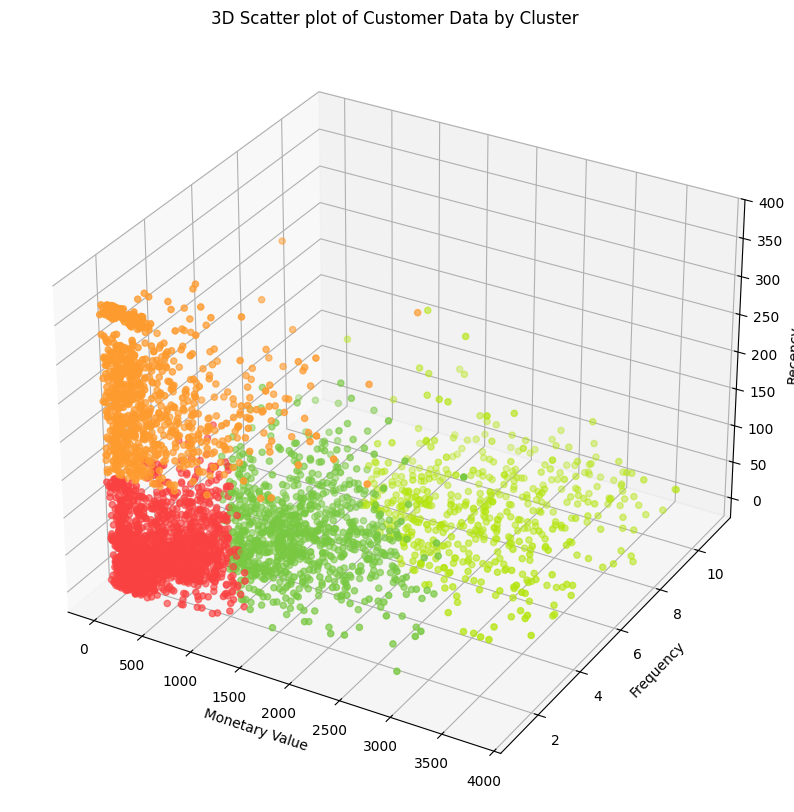

In [47]:
cluster_colors = {
    0: "#78C841",
    1: "#B4E50D",
    2: "#FF9B2F",
    3: "#FB4141"
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"],
                     non_outliers_df["Frequency"],
                     non_outliers_df["Recency"],
                     c=colors,
                     marker='o')

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter plot of Customer Data by Cluster")

plt.show()

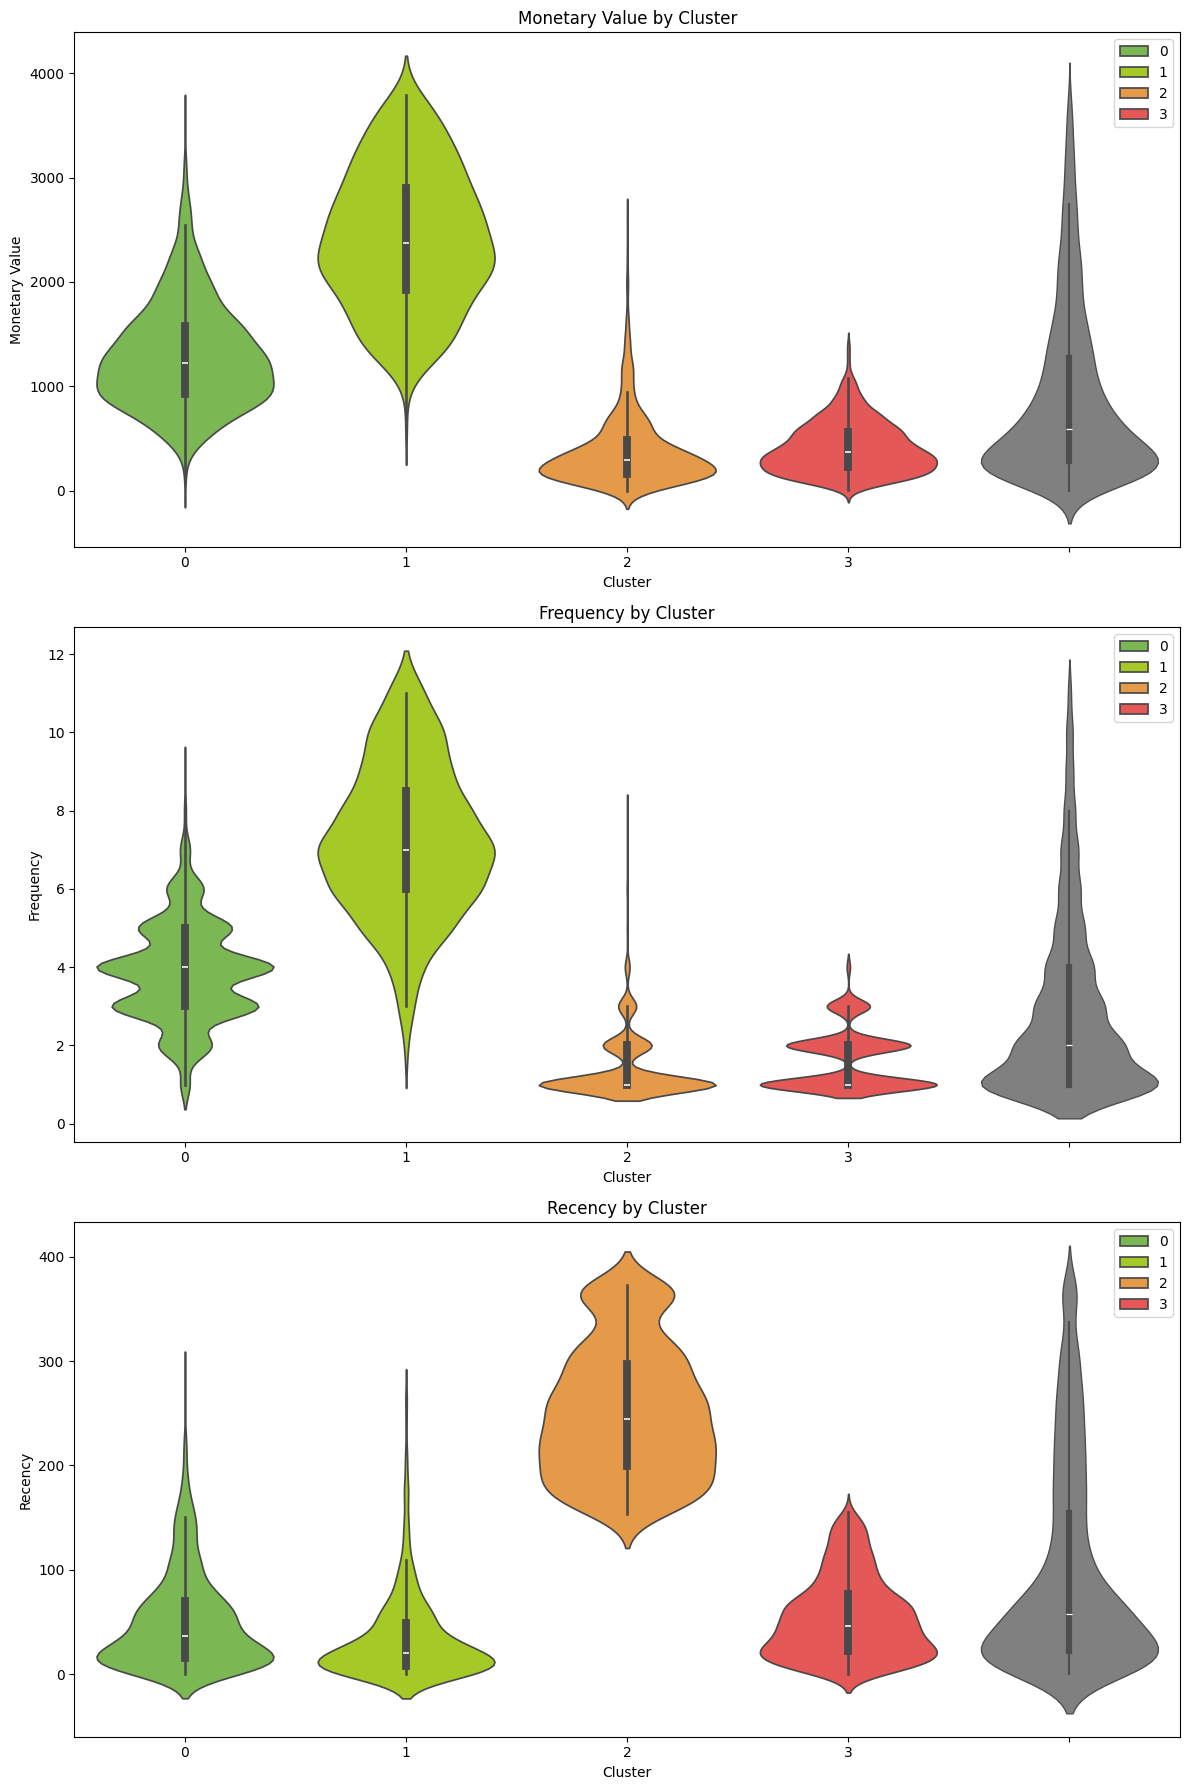

In [48]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df["MonetaryValue"], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel("Monetary Value")

plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df["Frequency"], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel("Frequency")

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df["Recency"], color='gray',linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

1. Cluster 0 (green): "Retain"

- Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
- Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (light green): "Reward"

- Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
- Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

3. Cluster 2 (orange): "Re-Engage"

- Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
- Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

4. Cluster 3 (red): "Nurture"

- Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
- Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

In [49]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers_df = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers_df = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers_df = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers_df["Cluster"] = -1
frequency_only_outliers_df["Cluster"] = -2
monetary_and_frequency_outliers_df["Cluster"] = -3

outlier_clustered_df = pd.concat([monetary_only_outliers_df, frequency_only_outliers_df, monetary_and_frequency_outliers_df])

outlier_clustered_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


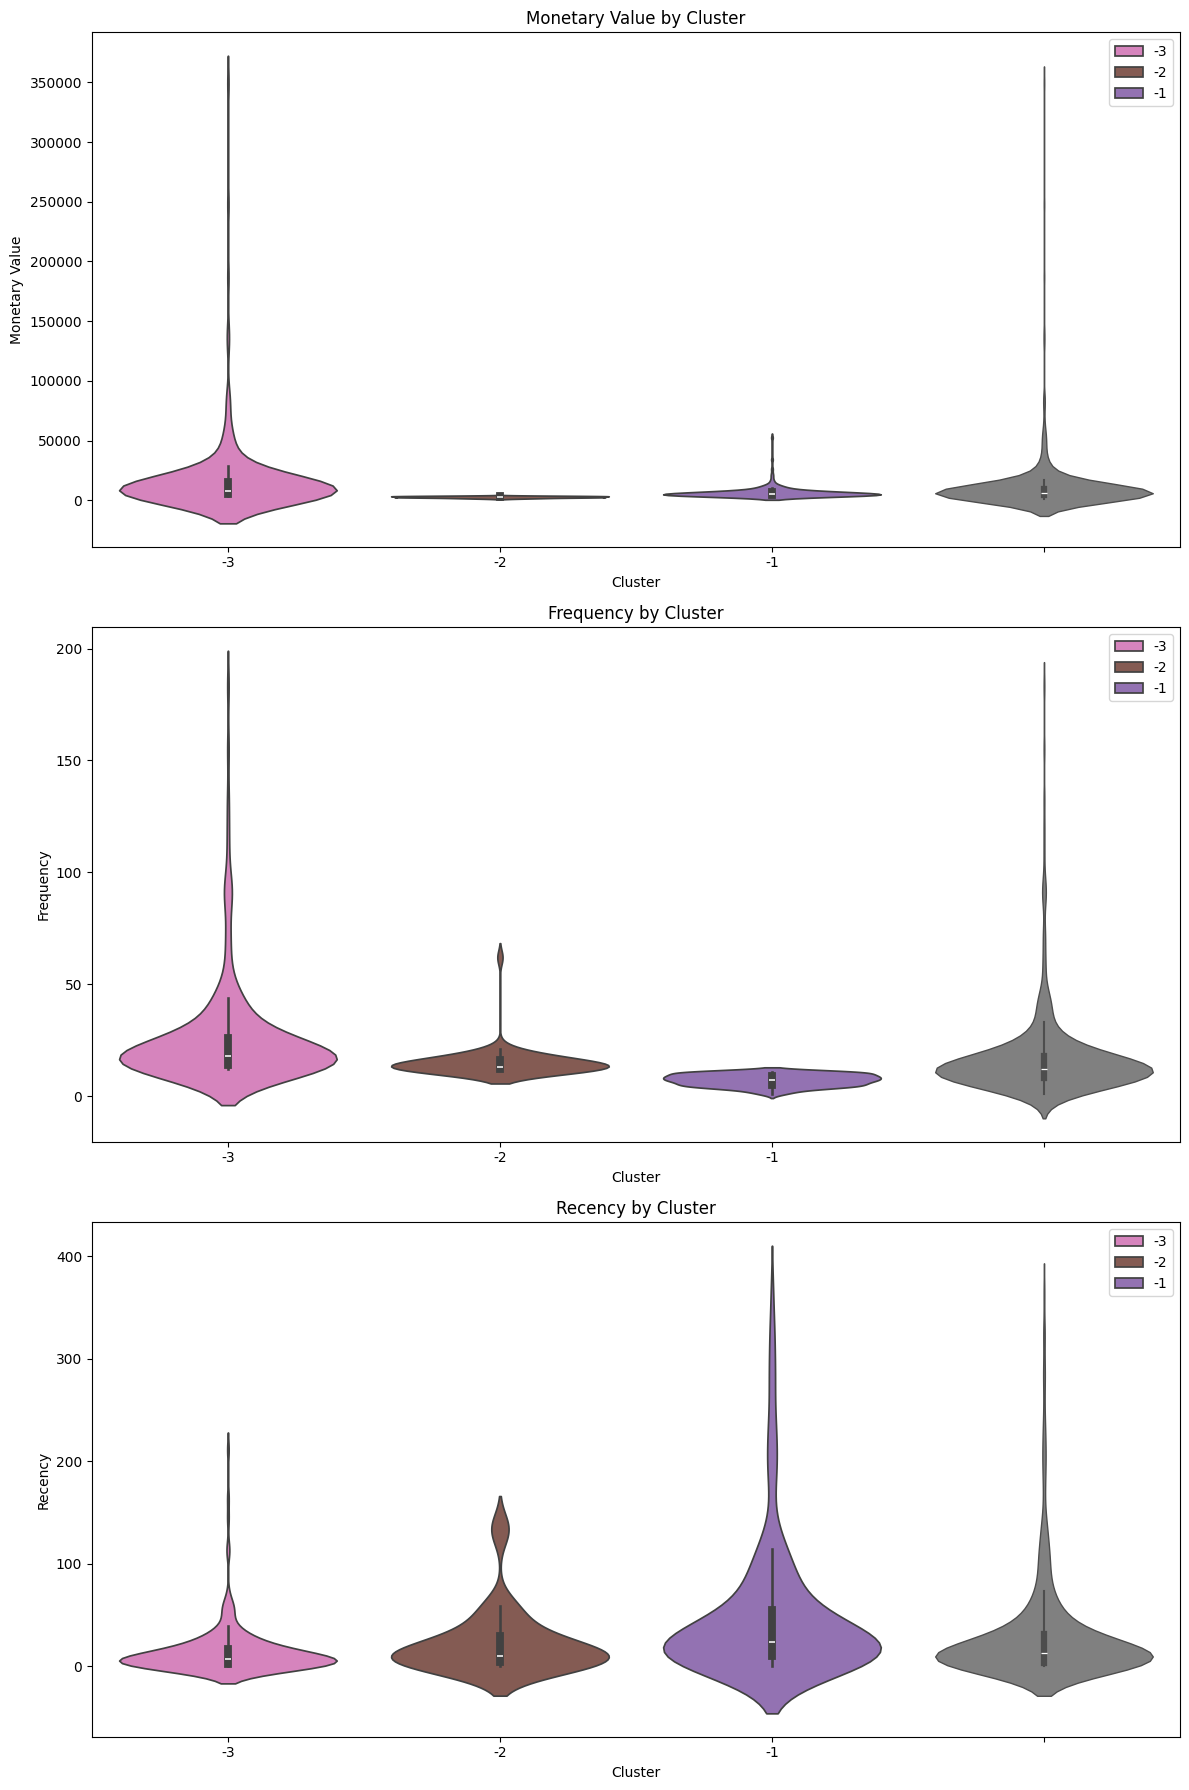

In [50]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clustered_df['Cluster'], y=outlier_clustered_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clustered_df["Cluster"])
sns.violinplot(y=outlier_clustered_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clustered_df['Cluster'], y=outlier_clustered_df['Frequency'], palette=cluster_colors, hue=outlier_clustered_df["Cluster"])
sns.violinplot(y=outlier_clustered_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clustered_df['Cluster'], y=outlier_clustered_df['Recency'], palette=cluster_colors, hue=outlier_clustered_df["Cluster"])
sns.violinplot(y=outlier_clustered_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

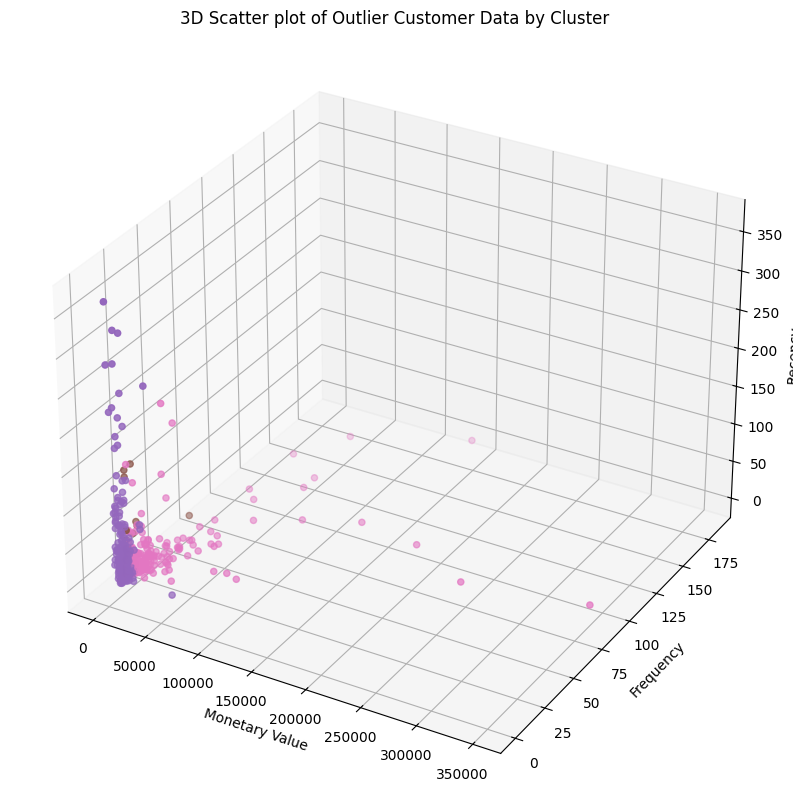

In [51]:
colors = outlier_clustered_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(outlier_clustered_df["MonetaryValue"],
                     outlier_clustered_df["Frequency"],
                     outlier_clustered_df["Recency"],
                     c=colors,
                     marker='o')

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter plot of Outlier Customer Data by Cluster")

plt.show()

1. Cluster -1 (Monetary Outliers) (purple) PAMPER:

- Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent. 
- Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

2. Cluster -2 (Frequency Outliers) (brown) UPSELL:

- Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. 
- Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

3. Cluster -3 (Monetary & Frequency Outliers) (pink) DELIGHT:

- Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. 
- Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [52]:
final_cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

full_clustering_df = pd.concat([non_outliers_df, outlier_clustered_df])
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,2
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,3
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,3
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [53]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(final_cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,2,NURTURE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,3,REWARD
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,3,REWARD
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


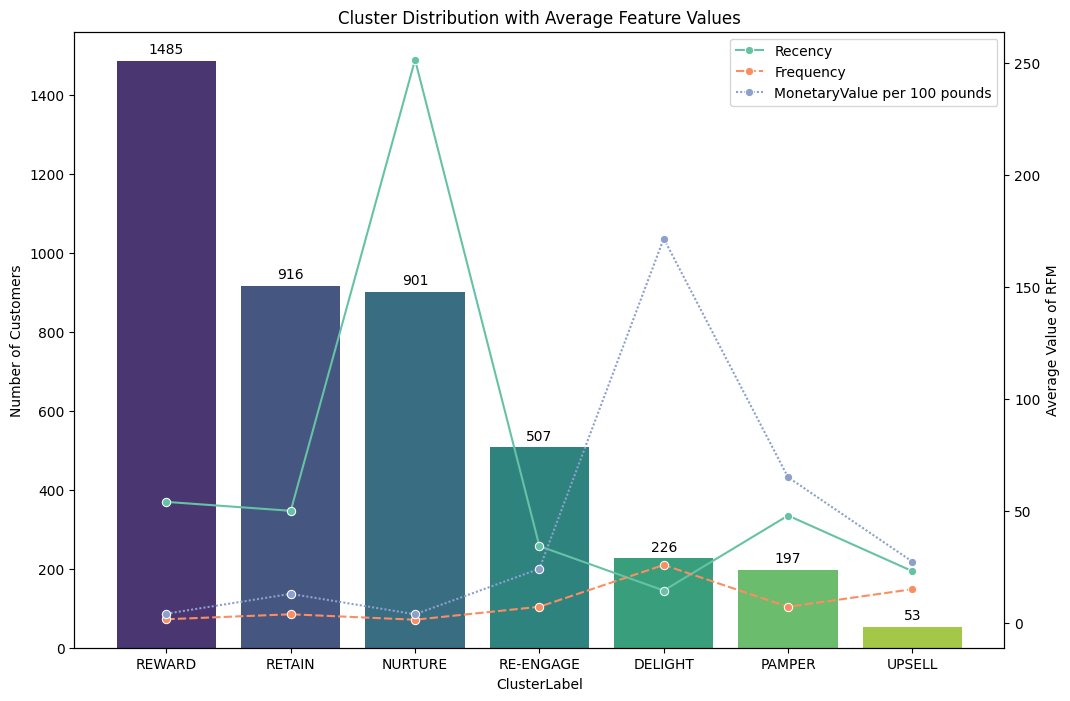

In [54]:
cluster_counts = full_clustering_df["ClusterLabel"].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby("ClusterLabel")[['Recency', 'Frequency','MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12,8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette="viridis", hue=cluster_counts.index)
ax1.set_ylabel("Number of Customers")
ax1.set_title("Cluster Distribution with Average Feature Values")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%0.f", label_type="edge", padding=3)

ax2 = ax1.twinx()

sns.lineplot(data= feature_means, ax=ax2, palette="Set2", marker="o")
ax2.set_ylabel("Average Value of RFM")

plt.show()